<a href="https://colab.research.google.com/github/aryachandrak/Machine-Learning-2024-Ganjil/blob/main/Week7_Tugas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tugas

### 1. Gunakan data 'Mall_Customers.csv'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage import io
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

In [3]:
# Load dataset
df = pd.read_csv('/content/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


### 2. Tentukan fitur apa yang tepat untuk melakukan clustering (minimal 2)

######a. Fitur Annual Income (k$)
Dengan menggunakan fitur ini, berguna untuk melihat pola konsumsi berdasarkan pendapatan yang dapat membantu dalam membagi pelanggan ke dalam segmen ekonomi yang berbeda.

######b. Fitur Spending Score (1-100),
Skor pengeluaran ini dapat membedakan pelanggan yang lebih aktif atau lebih sering berbelanja dibandingkan pelanggan lain, memberikan segmen berdasarkan kebiasaan belanja.

### 3. Buatlah model K-Means dengan mempertimbangkan jumlah k yang terbaik.

In [6]:
X = df.iloc[:,3:]
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [7]:
X.shape

(200, 2)

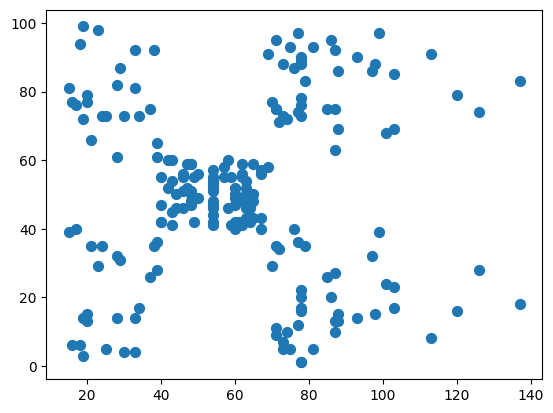

In [8]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 50)

Implementasi metode elbow

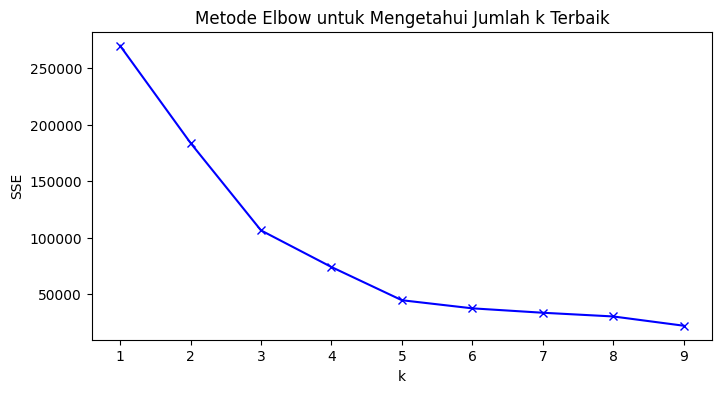

In [9]:
# List nilai SSE
sse = []
# Cari k terbaik dari 1-10
K = range(1,10)

for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    sse.append(kmeanModel.inertia_)

plt.figure(figsize=(8,4))
plt.plot(K, sse, "bx-")
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("Metode Elbow untuk Mengetahui Jumlah k Terbaik")
plt.show()

In [10]:
# Cek nilai SSE setiap k
for idx, sse_val in enumerate(sse, start=1):
    print(f'k={idx}; SSE={sse_val}')

k=1; SSE=269981.28000000014
k=2; SSE=183811.2827701642
k=3; SSE=106348.37306211119
k=4; SSE=73880.64496247198
k=5; SSE=44448.45544793369
k=6; SSE=37265.86520484345
k=7; SSE=33362.13364509054
k=8; SSE=30069.794232983328
k=9; SSE=21862.09267218289


k terbaik berada pada k=4

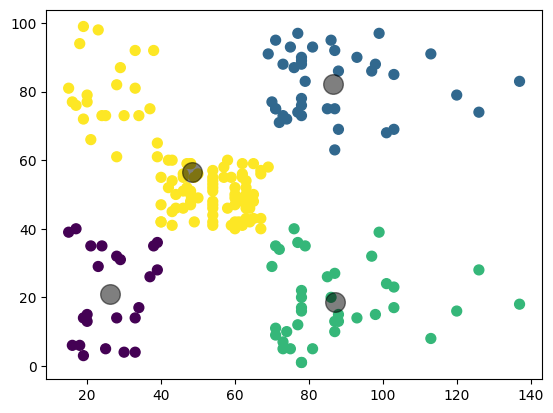

In [14]:
kmeans = KMeans(n_clusters=4)
y_kmeans = kmeans.fit_predict(X)

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [15]:
# Cek Nilai SSE
print(f'Nilai SSE: {kmeans.inertia_}')

Nilai SSE: 73679.78903948837


### 4. Buatlah implementasi model SOM untuk segmentasi citra lain

In [16]:
pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.3-py3-none-any.whl size=11706 sha256=8909b1fced00e330619ef77b392197aadbcd5890e52015d9e3e9c5e96c94bb07
  Stored in directory: /root/.cache/pip/wheels/96/98/a5/52dee3e8ed1dbfc4d77e4da41b6d89dd7ab9ead1b921e766f8
Successfully built minisom


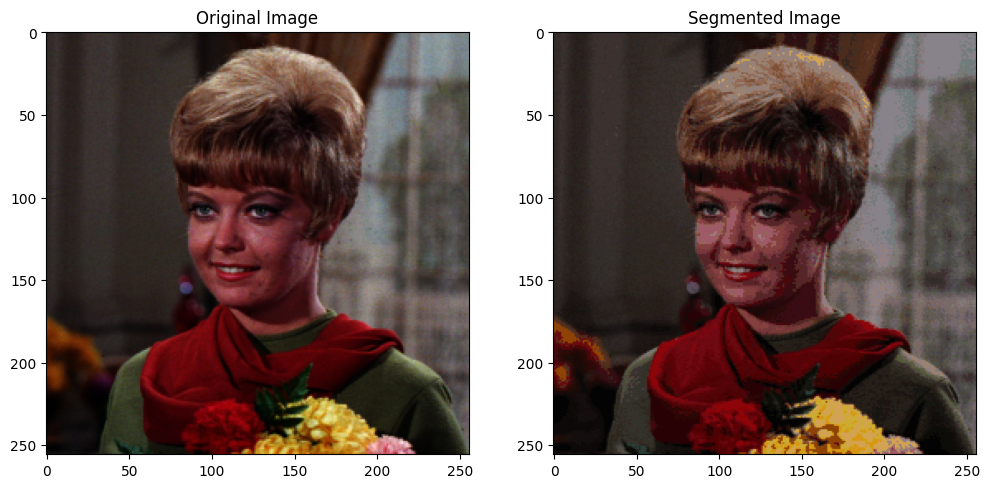

In [18]:
from minisom import MiniSom

# Load citra baru
image = io.imread('female.tiff') / 255.0  # Normalisasi intensitas piksel

# Ubah data menjadi vektor 2D (lebar * tinggi, 3) untuk setiap piksel
data = image.reshape(-1, 3)

# Inisialisasi SOM
som = MiniSom(10, 10, 3, sigma=0.5, learning_rate=0.5)
som.random_weights_init(data)

# Latih SOM
som.train_random(data, 100)

# Dapatkan hasil segmentasi
segmented_image = np.zeros_like(data)
for i, pixel in enumerate(data):
    winner = som.winner(pixel)
    segmented_image[i] = som.get_weights()[winner]

# Ubah hasil segmentasi kembali menjadi citra
segmented_image = segmented_image.reshape(image.shape)

# Plot hasil segmentasi
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(image)
ax[0].set_title('Original Image')
ax[1].imshow(segmented_image)
ax[1].set_title('Segmented Image')
plt.show()